In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score

In [3]:
X,y=load_iris(as_frame=True,return_X_y=True)

In [4]:
palette=['tab:purple', 'tab:green', 'tab:orange', 'tab:red']

/tmp/ipykernel_8113/489624781.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=X['sepal length (cm)'],y=X['sepal width (cm)'],hue=y,palette=palette)


<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

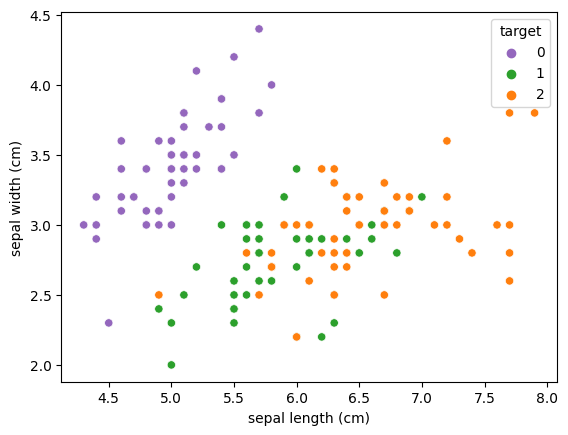

In [5]:
sns.scatterplot(x=X['sepal length (cm)'],y=X['sepal width (cm)'],hue=y,palette=palette)

/tmp/ipykernel_8113/537974557.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(y=X['sepal width (cm)'],col=y,palette=palette)
/tmp/ipykernel_8113/537974557.py:1: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.catplot(y=X['sepal width (cm)'],col=y,palette=palette)


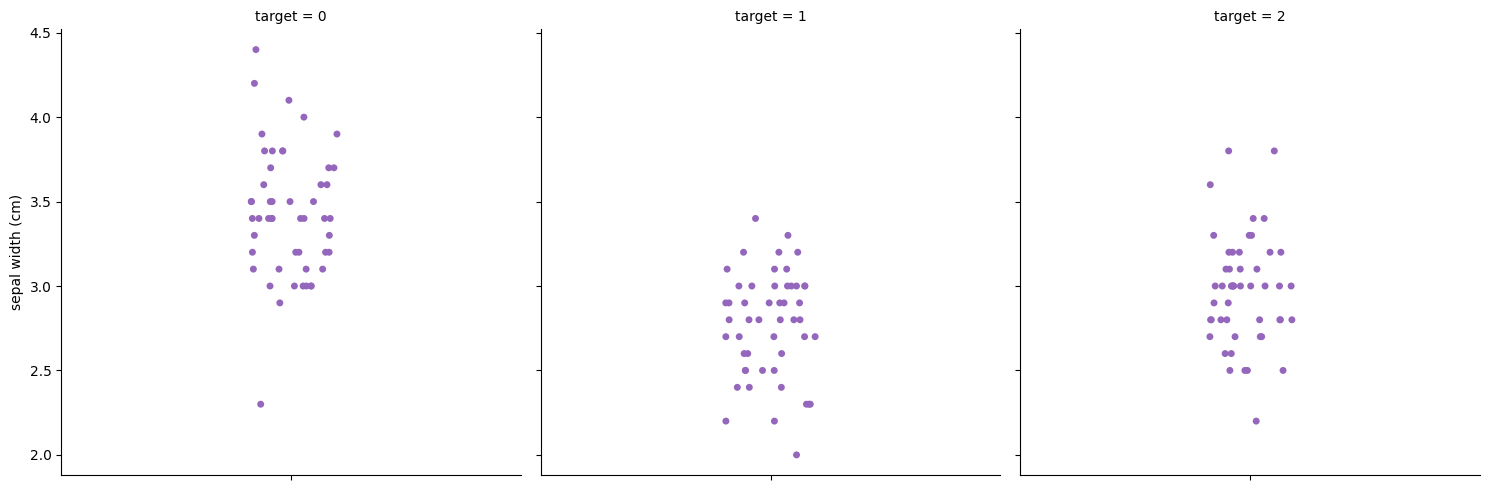

In [6]:
sns.catplot(y=X['sepal width (cm)'],col=y,palette=palette)

In [7]:
X_train , X_test , y_train, y_test = train_test_split(X,y,
                                                          random_state=10, test_size=0.2)

In [8]:
pipe=Pipeline(steps=[
        ('scaler',Normalizer()),
        ('classifier',KNeighborsClassifier())
])

In [9]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', KNeighborsClassifier())])

In [10]:
pipe.score(X_test,y_test)

0.9666666666666667

In [11]:
for x in range(1,5):
    pipe=Pipeline(steps=[
        ('scaler',Normalizer()),
        ('classifier',KNeighborsClassifier(n_neighbors=x))
    ])
    pipe.fit(X_train,y_train)
    print('score with ',x,pipe.score(X_test,y_test))

score with  1 0.9666666666666667
score with  2 0.9666666666666667
score with  3 0.9666666666666667
score with  4 0.9666666666666667


In [12]:
for x in range(1,5):
    pipe=Pipeline(steps=[
        ('scaler',Normalizer()),
        ('classifier',KNeighborsClassifier(n_neighbors=x))
    ])
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    print('score with ',x,accuracy_score(y_test,y_pred))

score with  1 0.9666666666666667
score with  2 0.9666666666666667
score with  3 0.9666666666666667
score with  4 0.9666666666666667


In [15]:
pipe=Pipeline(steps=[
    ('scaler',Normalizer()),
    ('classifier',KNeighborsClassifier(n_neighbors=3))
])
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print('score with ',x,f1_score(y_test,y_pred,average='weighted'))

score with  4 0.9671111111111111
